In [1]:
# Standard libraries
import numpy as np
import pandas as pd
import warnings
import zipfile, io

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Statistical libraries
import scipy.stats as ss
from scipy import stats
from scipy.stats import f_oneway
from scipy.sparse import csr_matrix

# Scikit-learn preprocessing and model selection
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Scikit-learn feature selection
from sklearn.feature_selection import f_classif, SelectKBest, mutual_info_classif, RFE, RFECV

# Scikit-learn models
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Scikit-learn metrics
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, classification_report

# Pickle for import and export of datasets
import pickle

# Seaborn settings
sns.set()

# Ignore warnings
warnings.filterwarnings('ignore')

# Enable inline plotting for Jupyter notebooks
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Define the function to find the best number of trees (from the earlier example)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier

In [2]:
X_train = pd.read_csv('datasets/final_data_train_delivery1.csv', index_col=0)
y_train = pd.read_csv('datasets/scaled_target_train_delivery1.csv', index_col=0)
X_val = pd.read_csv('datasets/final_data_val_delivery1.csv', index_col=0)
y_val = pd.read_csv('datasets/scaled_target_val_delivery1.csv', index_col=0)
X_test = pd.read_csv('datasets/final_data_test_delivery1.csv', index_col=0)

In [3]:
X_test.shape

(387975, 6)

In [ ]:
# all sets need to have same shape (train with train, val with val)
# test needs to have 387975 rows, 0 missing values

# 4. Modelling

### Baseline

In [5]:
def evaluate_model(model, X_train, y_train, X_val, y_val):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    
    # Compute metrics
    metrics = {
        "Train Accuracy": accuracy_score(y_train, train_preds),
        "Validation Accuracy": accuracy_score(y_val, val_preds),
        "Train F1 Score": f1_score(y_train, train_preds, average='weighted'),
        "Validation F1 Score": f1_score(y_val, val_preds, average='weighted')
    }
    
    # Print metrics
    print("Training Data Evaluation:")
    print(f"Accuracy (Train): {metrics['Train Accuracy']:.4f}")
    print(f"F1 Score (Train): {metrics['Train F1 Score']:.4f}")
    
    print("\nValidation Data Evaluation:")
    print(f"Accuracy (Validation): {metrics['Validation Accuracy']:.4f}")
    print(f"F1 Score (Validation): {metrics['Validation F1 Score']:.4f}")
    
    print("\nClassification Report (Validation):")
    print(classification_report(y_val, val_preds))

    # Determine class labels from y_train for the confusion matrix
    labels = np.unique(y_train)  # Get unique labels directly from the training data
    
    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_val, val_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix (Validation)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    return metrics


**Logistic Regression (Baseline)**

In [ ]:
lr = LogisticRegression()
lr_metrics = evaluate_model(lr, X_train, y_train, X_val, y_val)

**Random Forest (Baseline)**

In [ ]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_metrics = evaluate_model(rf, X_train, y_train, X_val, y_val)

**AdaBoost**

In [ ]:
adaboost = AdaBoostClassifier(random_state=42)
adaboost_metrics = evaluate_model(adaboost, X_train, y_train, X_val, y_val)

**Gradient Boosting**

In [ ]:
gb = GradientBoostingClassifier(random_state=42)
gb_metrics = evaluate_model(gb, X_train, y_train, X_val, y_val)

**DecisionTree**

In [ ]:
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_metrics = evaluate_model(dt, X_train, y_train, X_val, y_val)

**NaiveBayes**

In [ ]:
# Initialize the Gaussian Naive Bayes model with variance smoothing
gnb_model = GaussianNB(var_smoothing=1e-9)
gnb_metrics = evaluate_model(gnb_model, X_train, y_train, X_val, y_val)

**MultiLayerPerceptron**

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
mlp_metrics = evaluate_model(mlp, X_train, y_train, X_val, y_val)

**KNN**

Training Data Evaluation:
Accuracy (Train): 0.7607
F1 Score (Train): 0.7312

Validation Data Evaluation:
Accuracy (Validation): 0.7348
F1 Score (Validation): 0.7029

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.38      0.17      0.23      1791
           1       0.84      0.94      0.89     51345
           2       0.25      0.12      0.16     12380
           3       0.68      0.80      0.74     26268
           4       0.52      0.36      0.43      8578
           5       0.07      0.00      0.01       749
           6       0.00      0.00      0.00        16
           7       0.00      0.00      0.00        59

    accuracy                           0.73    101186
   macro avg       0.34      0.30      0.31    101186
weighted avg       0.69      0.73      0.70    101186



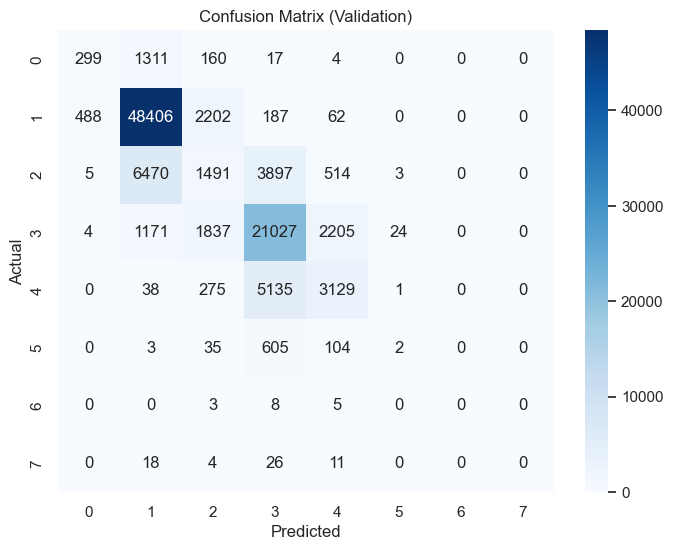

In [6]:
knn = KNeighborsClassifier()
knn_metrics = evaluate_model(knn, X_train, y_train, X_val, y_val)

# 6 minutes running

**XG Boost**

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb_metrics = evaluate_model(xgb, X_train, y_train, X_val, y_val)

**Comparisons**

In [ ]:
# create a dataframe to store the metrics
metrics_df = pd.DataFrame([lr_metrics, rf_metrics, adaboost_metrics, gb_metrics, dt_metrics, gnb_metrics, mlp_metrics, knn_metrics, xgb_metrics],
                          index=['Logistic Regression', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'Decision Tree', 'Naive Bayes', 'MLP', 'KNN', 'XGBoost'])

# display the dataframe
metrics_df

In [ ]:
# create a plot comparing f1 scores for train and validation sets
plt.figure(figsize=(12, 6))
metrics_df.sort_values('Validation F1 Score', ascending=False, inplace=True)
metrics_df[['Train F1 Score', 'Validation F1 Score']].plot(kind='bar', figsize=(12, 6), rot=20)
plt.ylabel('Weighted F1 Score')
plt.title('Weighted F1 Score Comparison for Train and Validation Sets')
plt.show()


## Embedded Methods

**Voting Classifier**

In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the individual models
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
gradient_boosting_model = GradientBoostingClassifier(random_state=42, n_estimators=100)

# Combine models in a VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('lr', logistic_model),
        ('rf', random_forest_model),
        ('gb', gradient_boosting_model)
    ],
    voting='soft'  # Soft voting for probability-based aggregation
)

In [ ]:
# Train the ensemble model
voting_clf.fit(X_train, y_train)

In [ ]:
# Make predictions on the training set
train_pred = voting_clf.predict(X_train)

# Make predictions on the validation set
val_pred = voting_clf.predict(X_val)

**Kaggle Submissions**

In [7]:
# substitute the nan values with the mean of the column
X_test = X_test.fillna(X_test.mean())

In [8]:
# Make predictions on the test data
pred_RF = knn.predict(X_test)

# Map the numerical predictions to injury types
label_mapping = {
    0: "1. CANCELLED",
    1: "2. NON-COMP",
    2: "3. MED ONLY",
    3: "4. TEMPORARY",
    4: "5. PPD SCH LOSS",
    5: "6. PPD NSL",
    6: "7. PTD",
    7: "8. DEATH",
    8: "Unknown"
}

predictions = [label_mapping[label] for label in pred_RF]

# Ensure 'Claim Identifier' is the index
submission_df = pd.DataFrame({
    'Claim Identifier': X_test.index, 
    'Claim Injury Type': predictions
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)
